# Sentiment_Analysis

Problem Statement:"To analyze and classify customer reviews as positive, negative, or neutral to gain insights into overall customer sentiment."

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix


In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

Data Collection:customer reviews from an e-commerce platform.

In [3]:
df_sentiment = pd.read_csv("sentiment_analysis .csv")

In [4]:
df_sentiment.shape

(74681, 4)

In [5]:
df_sentiment.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [6]:
pd.set_option('display.max_colwidth', None)

df_sentiment

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my Mac is like 6 years behind Nvidia drivers and I have no idea how I did not notice
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is 6 years behind on Nvidia drivers and I have no idea how I didn't notice
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice
74679,9200,Nvidia,Positive,Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice


In [7]:
# Count of unique games per GameName
game_counts = df_sentiment['Borderlands'].value_counts()

# Display the counts
print(game_counts)

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [8]:
# Count of unique games per GameName
game_counts = df_sentiment['Positive'].value_counts()

# Display the counts
print(game_counts)

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Positive, dtype: int64


In [9]:
df_sentiment.describe(include='all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


# 2. Data Preprocessing

Rename columns

In [10]:
df_sentiment.columns = ['EntryID', 'GameName', 'Sentiment', 'Text']

Remove the non games from the mage columns

In [11]:
# List of non-game names to be removed
non_game_names = [
    'Microsoft', 'Verizon', 'Facebook', 'johnson & johnson', 'Amazon', 
    'Home Depot', 'Xbox (X series)', 'PlayStation 5 (PS5)', 'Nvidia', 'Google'
]

# Filter the DataFrame to exclude rows with these non-game names
df_sentiment = df_sentiment[~df_sentiment['GameName'].isin(non_game_names)]

# Now df_sentiment_filtered contains only rows with actual game names

In [12]:
# Count of unique games per GameName
df_sentiment['GameName'].value_counts()

TomClancysRainbowSix                 2400
MaddenNFL                            2400
CallOfDuty                           2394
LeagueOfLegends                      2394
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
Battlefield                          2346
TomClancysGhostRecon                 2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
PlayStation5(PS5)                    2310
HomeDepot                            2310
CS-GO                                2304
Cyberpunk2077                        2304
GrandTheftAuto(GTA)                  2304
Hearthstone                          2298
Borderlands                          2285
PlayerUnknownsBattlegrounds(PUBG)    2274
Fortnite                          

Handling Missing Values

In [13]:
missing_values = df_sentiment.isna().sum()
missing_values

EntryID        0
GameName       0
Sentiment      0
Text         531
dtype: int64

Drop the rows with missing thext as dataset is large enough

In [14]:
# Remove rows with any missing values
df_sentiment = df_sentiment.dropna()

# Check for missing values again to confirm
missing_values = df_sentiment.isna().sum()
print("Missing values after removal:\n", missing_values)

Missing values after removal:
 EntryID      0
GameName     0
Sentiment    0
Text         0
dtype: int64


Handling Duplicate Values

In [15]:
df_sentiment.duplicated().sum()

1989

In [16]:
df_sentiment.drop_duplicates()

,EntryID,GameName,Sentiment,Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"
...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH


Remove the irrelevant words

In [17]:
# Filter out 'irrelevant' and 'neutral' rows from the same DataFrame
df_sentiment = df_sentiment[~df_sentiment['Sentiment'].isin(['Irrelevant'])]

In [18]:
df_sentiment.shape

(49038, 4)

# Data processing steps:

- Tokenization

- Removing stop words

- Removing non alphabetic

- Use stemming to remove the ending like (ing..)

In [19]:
# Define preprocessing functions
def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def remove_non_alphabetic(tokens):
    return [word for word in tokens if word.isalpha()]

def stem_words(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

def preprocess_text(text):
    tokens = tokenize(text)
    tokens = remove_stop_words(tokens)
    tokens = remove_non_alphabetic(tokens)
    tokens = stem_words(tokens)
    return tokens

# Apply preprocessing to the 'Text' column
df_sentiment['Processed_Text'] = df_sentiment['Text'].apply(preprocess_text)

In [20]:
df_sentiment

,EntryID,GameName,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[i, come, border, i, kill]"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]"
...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]"
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH,"[in, tom, clanci, a, the, ghost, hous, recon, choke, point, ift, tt]"


# Exploratory Data Analysis (EDA):
Provide basic statistics and visualizations to understand the distribution of sentiments in the dataset.
Explore the most common positive and negative words.

In [21]:
from collections import Counter
import itertools

# Assuming 'Processed_Text' is a list of words for each row
all_words = list(itertools.chain(*df_sentiment['Processed_Text']))
word_counts = Counter(all_words)

# Filter out words that appear only once
repeating_words = {word: count for word, count in word_counts.items() if count > 1}

In [22]:
sentiment_counts = df_sentiment['Sentiment'].value_counts()

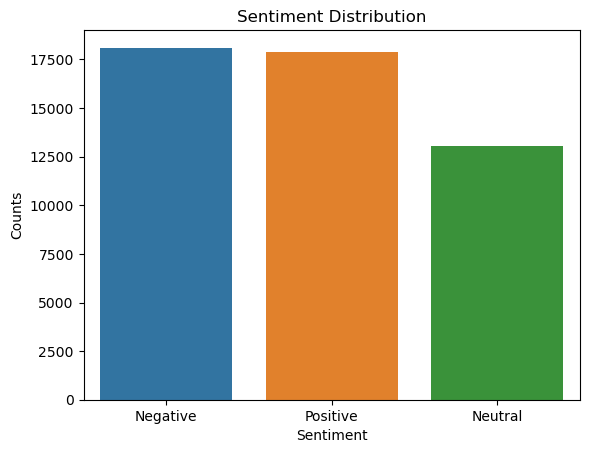

In [23]:
# Assuming 'sentiment_counts' is your Series with sentiment counts
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.ylabel('Counts')
plt.xlabel('Sentiment')
plt.show()

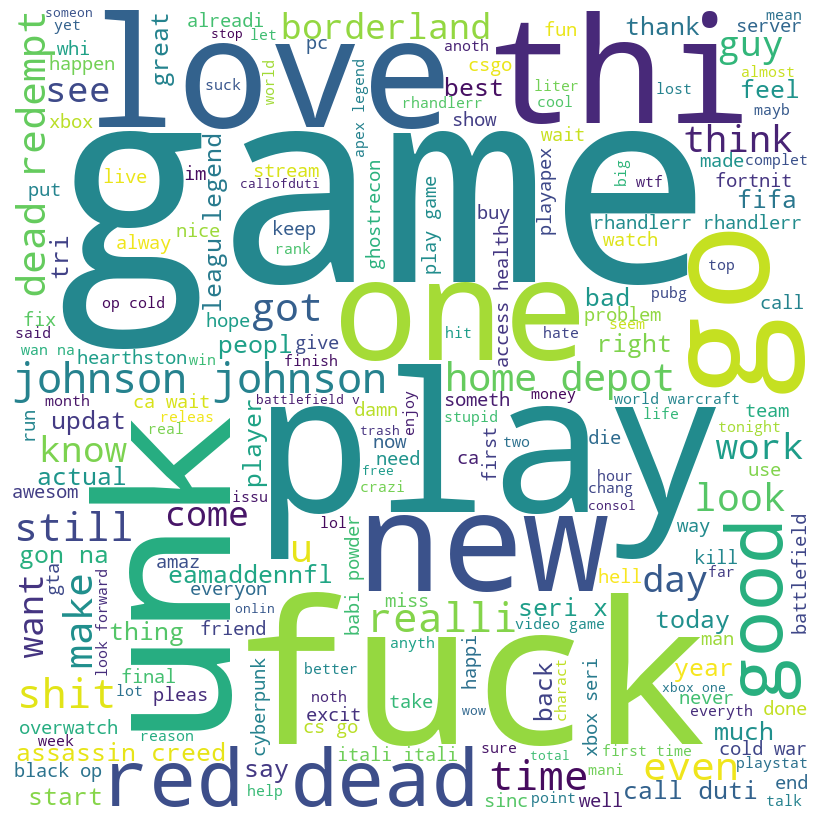

In [24]:
# Assuming 'all_words' is a list of all words in your processed text
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(' '.join(all_words))

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [25]:
df_sentiment

,EntryID,GameName,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[i, come, border, i, kill]"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]"
...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]"
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]"
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH,"[in, tom, clanci, a, the, ghost, hous, recon, choke, point, ift, tt]"


In [26]:
from collections import defaultdict, Counter

# Initialize dictionaries to store word counts for each sentiment
positive_words = defaultdict(int)
negative_words = defaultdict(int)
neutral_words = defaultdict(int)

# Iterate over the DataFrame and update the counts
for _, row in df_sentiment.iterrows():
    sentiment = row['Sentiment']
    for word in row['Processed_Text']:
        if sentiment == 'Positive':
            positive_words[word] += 1
        elif sentiment == 'Negative':
            negative_words[word] += 1
        elif sentiment == 'Neutral':
            neutral_words[word] += 1

# Now, find the most common words for each sentiment
most_common_positive = Counter(positive_words).most_common(30)
most_common_negative = Counter(negative_words).most_common(30)
most_common_neutral = Counter(neutral_words).most_common(30)

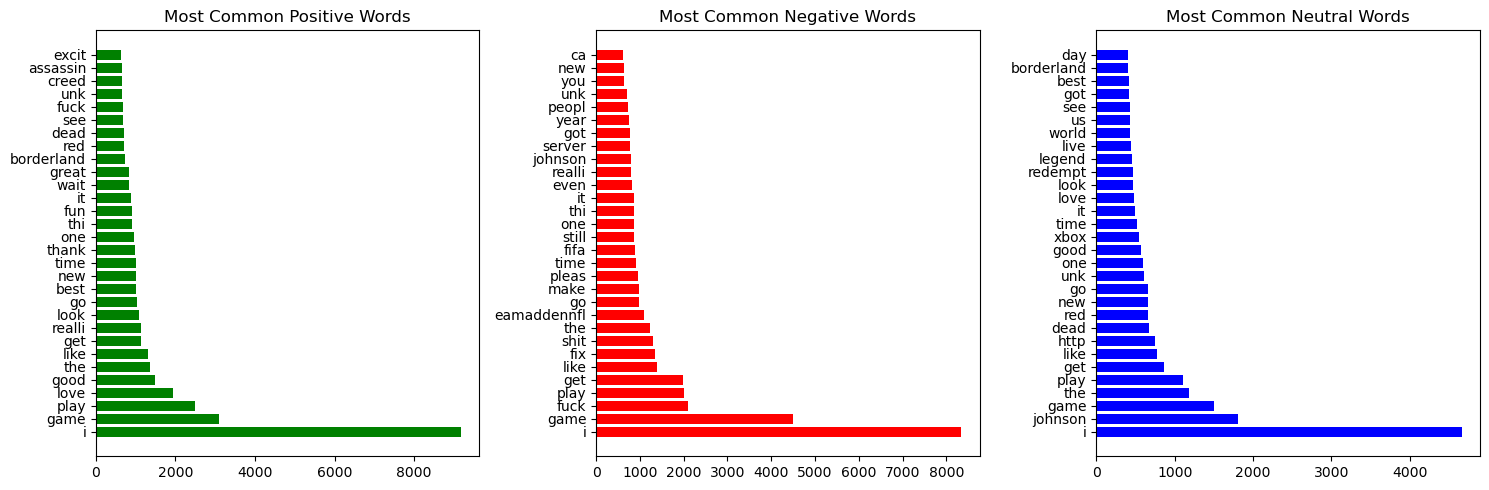

In [27]:
import matplotlib.pyplot as plt

# Function to plot a horizontal bar chart for sentiment words
def plot_most_common_words(most_common, title, ax, color):
    words, counts = zip(*most_common)
    ax.barh(words, counts, color=color)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each sentiment
plot_most_common_words(most_common_positive, 'Most Common Positive Words', axes[0], 'green')
plot_most_common_words(most_common_negative, 'Most Common Negative Words', axes[1], 'red')
plot_most_common_words(most_common_neutral, 'Most Common Neutral Words', axes[2], 'blue')

plt.tight_layout()
plt.show()

In [28]:
# Printing the two most common words for each sentiment
print("Two Most Common Positive Words:", most_common_positive[:2])
print("Two Most Common Negative Words:", most_common_negative[:2])
print("Two Most Common Neutral Words:", most_common_neutral[:2])

Two Most Common Positive Words: [('i', 9183), ('game', 3107)]
Two Most Common Negative Words: [('i', 8347), ('game', 4491)]
Two Most Common Neutral Words: [('i', 4664), ('johnson', 1806)]


# Features Enginering: 
Consider features such as word frequency, TF-IDF scores, 

In [29]:
df_sentiment.shape

(49038, 5)

In [30]:
# Initialize the label encoder
game_name_encoder = LabelEncoder()

# Fit and transform the GameName column
df_sentiment['GameName_Encoded'] = game_name_encoder.fit_transform(df_sentiment['GameName'])

# Get the mapping of game names to encoded numbers
game_name_mapping = dict(zip(game_name_encoder.classes_, game_name_encoder.transform(game_name_encoder.classes_)))

print("Game Name to Number Mapping:")
print(game_name_mapping)

Game Name to Number Mapping:
{'ApexLegends': 0, 'AssassinsCreed': 1, 'Battlefield': 2, 'Borderlands': 3, 'CS-GO': 4, 'CallOfDuty': 5, 'CallOfDutyBlackopsColdWar': 6, 'Cyberpunk2077': 7, 'Dota2': 8, 'FIFA': 9, 'Fortnite': 10, 'GrandTheftAuto(GTA)': 11, 'Hearthstone': 12, 'HomeDepot': 13, 'LeagueOfLegends': 14, 'MaddenNFL': 15, 'NBA2K': 16, 'Overwatch': 17, 'PlayStation5(PS5)': 18, 'PlayerUnknownsBattlegrounds(PUBG)': 19, 'RedDeadRedemption(RDR)': 20, 'TomClancysGhostRecon': 21, 'TomClancysRainbowSix': 22, 'WorldOfCraft': 23, 'Xbox(Xseries)': 24, 'johnson&johnson': 25}


In [31]:
# Initialize another label encoder for Sentiment
sentiment_encoder = LabelEncoder()

# Fit and transform the Sentiment column
df_sentiment['Sentiment_Encoded'] = sentiment_encoder.fit_transform(df_sentiment['Sentiment'])

# Get the mapping of sentiment labels to encoded numbers
label_mapping = dict(zip(sentiment_encoder.classes_, sentiment_encoder.transform(sentiment_encoder.classes_)))

print("Sentiment to Number Mapping:")
print(label_mapping)

Sentiment to Number Mapping:
{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the list of words in Processed_Text into a single string per row
df_sentiment['Processed_Text_Joined'] = df_sentiment['Processed_Text'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the Processed_Text_Joined column
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sentiment['Processed_Text_Joined'])

In [33]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

drop the columns that are not needede

In [34]:
df_sentiment

,EntryID,GameName,Sentiment,Text,Processed_Text,GameName_Encoded,Sentiment_Encoded,Processed_Text_Joined
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[i, come, border, i, kill]",3,2,i come border i kill
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]",3,2,im get borderland kill
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]",3,2,im come borderland murder
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]",3,2,im get borderland murder
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]",3,2,im get borderland murder
...,...,...,...,...,...,...,...,...
72378,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]",21,1,tom clanci ghost recon choke point
72379,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 36QWteH,"[tom, clanci, ghost, recon, choke, point]",21,1,tom clanci ghost recon choke point
72380,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH,"[tom, lin, ghost, recon, choke, point]",21,1,tom lin ghost recon choke point
72381,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Choke Point ift. tt / 36QWteH,"[in, tom, clanci, a, the, ghost, hous, recon, choke, point, ift, tt]",21,1,in tom clanci a the ghost hous recon choke point ift tt


In [35]:
df_sentiment = df_sentiment.drop(columns=['EntryID', 'GameName', 'Sentiment', 'Text', 'Processed_Text', 'Processed_Text_Joined'])

In [36]:
df_sentiment.head()

,GameName_Encoded,Sentiment_Encoded
0,3,2
1,3,2
2,3,2
3,3,2
4,3,2


# Model Selection: 

In [37]:
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Model Training:

In [38]:
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle


# Combine the TF-IDF features with the encoded GameName and Sentiment
X = hstack((tfidf_matrix, df_sentiment[['GameName_Encoded', 'Sentiment_Encoded']].values))
y = df_sentiment['Sentiment_Encoded']  # assuming you want to predict Sentiment

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = nb_classifier.predict(X_test)

# Model Evaluation:
Assess the model's performance using metrics such as accuracy, precision, recall, and F1 score.
Include a confusion matrix to visualize classification results.

Accuracy of the test and train data

In [39]:
# Evaluate model accuracy on the test set
print('Test-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, predictions)))

# Make predictions on the training set
y_pred_train = nb_classifier.predict(X_train)

# Evaluate model accuracy on the training set
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Test-set accuracy score: 0.8988
Training-set accuracy score: 0.9211


check class distribution in test set

In [40]:
y_test.value_counts()

0    5450
2    5293
1    3969
Name: Sentiment_Encoded, dtype: int64

We can see that the occurences of most frequent class is 5450. So, we can calculate null accuracy by dividing 5450 by total number of occurences.

Confusion matrix of the test and train data

In [41]:
# Create the confusion matrix
print("confusion_matrix of test data \n",confusion_matrix(y_test, predictions))
print("confusion_matrix of train data \n",confusion_matrix(y_train, y_pred_train))

confusion_matrix of test data 
 [[5360   24   66]
 [   0 2743 1226]
 [   0  173 5120]]
confusion_matrix of train data 
 [[12473    31   150]
 [    0  6819  2266]
 [    0   260 12327]]


Classification_report  of the test and train data

In [42]:
print("classification_report of test data \n",classification_report(y_test, predictions))
print("classification_reportof train data \n",classification_report(y_train, y_pred_train))

classification_report of test data 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5450
           1       0.93      0.69      0.79      3969
           2       0.80      0.97      0.87      5293

    accuracy                           0.90     14712
   macro avg       0.91      0.88      0.89     14712
weighted avg       0.91      0.90      0.90     14712

classification_reportof train data 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     12654
           1       0.96      0.75      0.84      9085
           2       0.84      0.98      0.90     12587

    accuracy                           0.92     34326
   macro avg       0.93      0.91      0.91     34326
weighted avg       0.93      0.92      0.92     34326



ROC

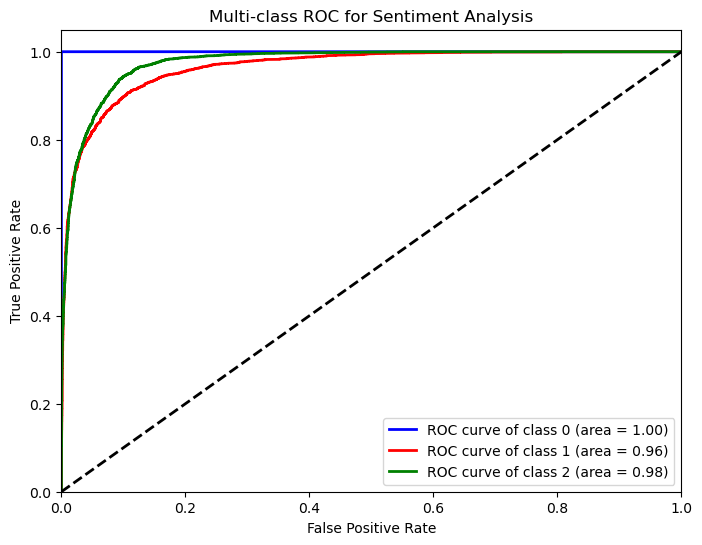

In [43]:
# Binarize the output labels for each class
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Predict probabilities
y_score = nb_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Sentiment Analysis')
plt.legend(loc="lower right")
plt.show()

In [44]:
# Binarize the y_test labels for multi-class ROC AUC calculation
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities for each class
y_score = nb_classifier.predict_proba(X_test)

# Compute ROC AUC
# For multi-class, specify 'ovr' for One-vs-Rest or use 'weighted' for weighted averaging
ROC_AUC = roc_auc_score(y_test_binarized, y_score, multi_class='ovr')

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9800


# Conclusion

Exceptional Performance on Class 0 (Neutral):

With an F1-score of 0.99 and an AUC of 1.00, your model excels at identifying neutral sentiments. This indicates that the model has an ideal balance of precision and recall for Class 0, with virtually no misclassifications.

The model is very good bewteen distinguish from different classe. For Class 1 (Negative) and Class 2 (Positive):

The model also performs very well in distinguishing negative and positive sentiments, as indicated by the high AUC values of 0.96 for Class 1 and 0.98 for Class 2.

The F1-scores for these classes is 0.79 for Class 1 and 0.87 for Class 2

High Overall Accuracy:

An overall accuracy of 0.90 demonstrates that the model is generally reliable across all sentiment classes.

Areas for Improvement

Class 1 (Negative) Performance:

While still good, the performance on Class 1 is slightly lower compared to the other classes. The F1-score of 0.79 suggests there is some room for improvement, particularly in increasing the recall (0.69) without significantly sacrificing precision (0.93). Balancing Precision and Recall for Class 2 (Positive):

For Class 2, while the recall is very high (0.97), precision is relatively lower (0.80). This suggests that while the model is adept at identifying most positive sentiments, it also has a higher tendency to misclassify some non-positive sentiments as positive.

In [60]:
from sklearn.model_selection import GridSearchCV

# Results :

In [45]:
predict_=pd.DataFrame(y_pred_train,columns=['Predict values'])
predict_.head(10)

,Predict values
0,2
1,2
2,2
3,2
4,0
5,2
6,0
7,2
8,1
9,0


In [46]:
y_train.head(10)

4565     2
68405    2
17322    2
4363     2
11723    0
40434    2
421      0
70293    2
57738    1
55704    0
Name: Sentiment_Encoded, dtype: int32

In [47]:
from sklearn.svm import SVC

In [48]:
models=SVC()

In [51]:
models.fit(X_train, y_train)

SVC()

In [57]:
ypreds=models.predict(X_test)
print(accuracy_score(ypreds,y_test))
print(confusion_matrix(ypreds,y_test))
print(classification_report(ypreds,y_test))

1.0
[[5450    0    0]
 [   0 3969    0]
 [   0    0 5293]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5450
           1       1.00      1.00      1.00      3969
           2       1.00      1.00      1.00      5293

    accuracy                           1.00     14712
   macro avg       1.00      1.00      1.00     14712
weighted avg       1.00      1.00      1.00     14712



In [58]:
xpreds=models.predict(X_train)
print(accuracy_score(xpreds,y_train))
print(confusion_matrix(xpreds,y_train))
print(classification_report(xpreds,y_train))

1.0
[[12654     0     0]
 [    0  9085     0]
 [    0     0 12587]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12654
           1       1.00      1.00      1.00      9085
           2       1.00      1.00      1.00     12587

    accuracy                           1.00     34326
   macro avg       1.00      1.00      1.00     34326
weighted avg       1.00      1.00      1.00     34326



In [ ]:
svc_model = SVC()
hyp_grid = {'C':np.arange (1,50),
           "kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}
cv = 5         
# rbf >> Radial Basis Function

gscv_model = GridSearchCV(svc_model,hyp_grid,cv = cv)
gscv_model.fit(X_train, y_train)

In [ ]:
gscv_model.best_estimator_